## Problem 1: Compare histogram of 2 images

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


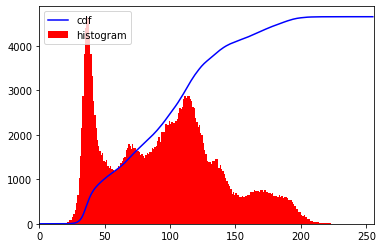

In [26]:
img = cv.imread('/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Sosanh2Anh/lena.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf*float(hist.max())/cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256,],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


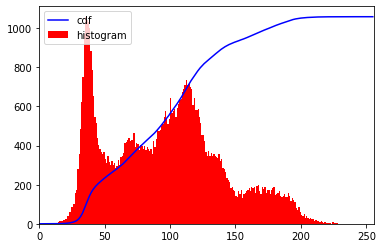

In [27]:
img_256 = cv.imread('/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Sosanh2Anh/lena256.jpg',0)

hist_256,bins_256 = np.histogram(img_256.flatten(),256,[0,256])
cdf_256 = hist_256.cumsum()
cdf_normalized_256 = cdf_256*float(hist_256.max())/cdf_256.max()

plt.plot(cdf_normalized_256, color = 'b')
plt.hist(img_256.flatten(),256,[0,256,],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [7]:
img_512_size = img.shape[0] * img.shape[1]
img_256_size = img_256.shape[0] * img_256.shape[1]
hist_512_norm = hist / img_512_size
hist_256_norm = hist_256 / img_256_size

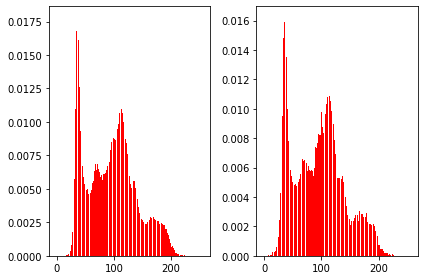

In [42]:
value = np.delete(bins, -1)
fig, axs = plt.subplots(1,2,tight_layout=True)
axs[0].bar(value, hist_512_norm, color='r')
axs[1].bar(value, hist_256_norm, color='r')
plt.show()

In [ ]:
def convertType(hist):
  return hist.astype('float32')
def compareHist_(hist1, hist2):
  return cv.compareHist(convertType(hist1),convertType(hist2),cv.HISTCMP_CORREL)
compareHist_(hist_512_norm, hist_256_norm)

0.9946326211865096

## Problem 2: Compare histogram of many images

In [ ]:
def calcHist(path):
  '''Calculate histogram of a image'''
  img = cv.imread(path, 0)
  hist, bins = np.histogram(img.flatten(),256,[0,256])
  imgSize = img.shape[0] * img.shape[1]
  hist = hist / imgSize
  return hist

In [ ]:
# Calculate histogram of image in Train folder
pathTrain = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Sosanh2Anh/DogCatSimple/train/'
dirTrain = sorted(os.listdir(pathTrain))
listHistTrain = []
for image in dirTrain:
  listHistTrain.append(calcHist(os.path.join(pathTrain,image)))

In [ ]:
# Calculate histogram of image in Test folder
pathTest = '/content/drive/MyDrive/Study Documents/CS231 - CV/CS231.L21.KHTN/Sosanh2Anh/DogCatSimple/test/'
dirTest = sorted(os.listdir(pathTest))
listHistTest = []
for image in dirTest:
  listHistTest.append(calcHist(os.path.join(pathTest,image)))

In [ ]:
# Compare each histogram in Train folder with any histograms in Test folder and get Top 5 the same
listSameImg = []
for histTrain in listHistTrain:
  listComp = []
  for histTest in listHistTest:
    listComp.append(compareHist_(histTrain, histTest))
  index = sorted(range(len(listComp)), key= lambda k: listComp[k], reverse=True)
  index = index[:5]
  listSameImg.append(index)

In [ ]:
def showImg(images, n_row=3, n_col=7):
    '''Show image as a gallery'''
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    j = -1
    for i in range(n_row * n_col):
        j += 1
        if i % n_col == 1:
          j -= 1
          continue
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[j])
        plt.xticks(())
        plt.yticks(())

In [ ]:
# Get NUM_IMG_IN_TRAIN image from Train folder and Top 5 the same image with each
NUM_IMG_IN_TRAIN = 5
images = []
for i in range(NUM_IMG_IN_TRAIN):
  images.append(plt.imread(os.path.join(pathTrain, dirTrain[i])))
  for j in range(5):
    images.append(plt.imread(os.path.join(pathTest, dirTest[listSameImg[i][j]])))

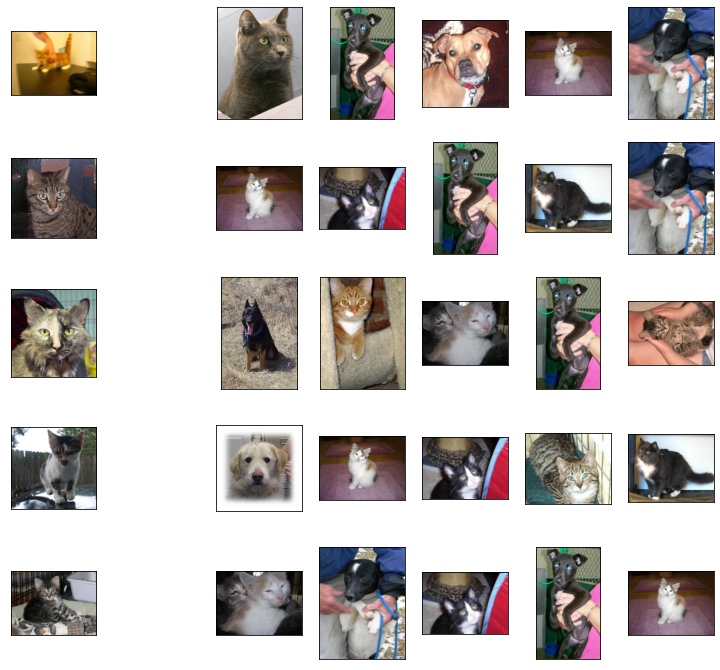

In [ ]:
showImg(images, NUM_IMG_IN_TRAIN)